In [58]:
import os
import pandas as pd
%matplotlib inline

from path import Path
import numpy as np
import hvplot.pandas
import nltk
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
from ibm_watson import ToneAnalyzerV3
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
import panel as pn
from nltk.corpus import reuters
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use("seaborn-whitegrid")
pn.extension("plotly")

In [59]:

analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [7]:
# Read your api key environment variable
news_api = os.getenv("news_api")

In [8]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api)

In [47]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en", page_size=100)

In [13]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en", page_size=100)

In [14]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/enriqueserizawa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [30]:
# Define a function to get the sentiment scores
def get_sentiment_scores(text, date, source, url):
    sentiment_scores = {}

    # Sentiment scoring with VADER
    text_sentiment = analyzer.polarity_scores(text)
    sentiment_scores["date"] = date
    sentiment_scores["text"] = text
    sentiment_scores["source"] = source
    sentiment_scores["url"] = url
    sentiment_scores["compound"] = text_sentiment["compound"]
    sentiment_scores["pos"] = text_sentiment["pos"]
    sentiment_scores["neu"] = text_sentiment["neu"]
    sentiment_scores["neg"] = text_sentiment["neg"]
    if text_sentiment["compound"] >= 0.05:  # Positive
        sentiment_scores["normalized"] = 1
    elif text_sentiment["compound"] <= -0.05:  # Negative
        sentiment_scores["normalized"] = -1
    else:
        sentiment_scores["normalized"] = 0  # Neutral

    return sentiment_scores

In [31]:
# Empty list to store the DataFrame structure
sentiments_data = []

# Loop through all the news articles
for article in bitcoin_news["articles"]:
    try:
        # Get sentiment scoring using the get_sentiment_score() function
        sentiments_data.append(
            get_sentiment_scores(
                article["content"],
                article["publishedAt"][:10],
                article["source"]["name"],
                article["url"],
            )
        )

    except AttributeError:
        pass

# Create a DataFrame with the news articles' data and their sentiment scoring results
bitcoin_df = pd.DataFrame(sentiments_data)

# Sort the DataFrame rows by date
bitcoin_df = bitcoin_df.sort_values(by="date", ascending=False)

# Define the date column as the DataFrame's index
bitcoin_df.set_index("date", inplace=True)
bitcoin_df.head()

,compound,neg,neu,normalized,pos,source,text,url
date,,,,,,,,
2019-10-21,0.5070,0.000,0.932,1,0.068,The Next Web,Our robot colleague Satoshi Nakaboto writes ab...,https://thenextweb.com/hardfork/2019/10/21/sat...
2019-10-21,0.9141,0.000,0.776,1,0.224,Boingboing.net,"Aestetix writes, ""We have good news. There wil...",https://boingboing.net/2019/10/21/st-johns-u-q...
2019-10-21,-0.5719,0.156,0.780,-1,0.064,The Next Web,Mexican officials have been forced to free Ovi...,https://thenextweb.com/hardfork/2019/10/21/opp...
2019-10-21,0.0516,0.042,0.911,1,0.047,Androidcommunity.com,"Back in May, the mobile industry learned the H...",https://androidcommunity.com/htc-exodus-1s-rea...
2019-10-20,0.5070,0.000,0.932,1,0.068,The Next Web,Our robot colleague Satoshi Nakaboto writes ab...,https://thenextweb.com/hardfork/2019/10/20/sat...


In [38]:
# Define a function to get the sentiment scores
def get_sentiment_scores(text, date, source, url):
    sentiment_scores = {}

    # Sentiment scoring with VADER
    text_sentiment = analyzer.polarity_scores(text)
    sentiment_scores["date"] = date
    sentiment_scores["text"] = text
    sentiment_scores["source"] = source
    sentiment_scores["url"] = url
    sentiment_scores["compound"] = text_sentiment["compound"]
    sentiment_scores["pos"] = text_sentiment["pos"]
    sentiment_scores["neu"] = text_sentiment["neu"]
    sentiment_scores["neg"] = text_sentiment["neg"]
    if text_sentiment["compound"] >= 0.05:  # Positive
        sentiment_scores["normalized"] = 1
    elif text_sentiment["compound"] <= -0.05:  # Negative
        sentiment_scores["normalized"] = -1
    else:
        sentiment_scores["normalized"] = 0  # Neutral

    return sentiment_scores

# Empty list to store the DataFrame structure
sentiments_data = []


# Loop through all the news articles
for article in ethereum_news["articles"]:
    try:
        # Get sentiment scoring using the get_sentiment_score() function
        sentiments_data.append(
            get_sentiment_scores(
                article["content"],
                article["publishedAt"][:10],
                article["source"]["name"],
                article["url"],
            )
        )

    except AttributeError:
        pass

# Create a DataFrame with the news articles' data and their sentiment scoring results
ethereum_df = pd.DataFrame(sentiments_data)

# Sort the DataFrame rows by date
ethereum_df = ethereum_df.sort_values(by="date", ascending=False)

# Define the date column as the DataFrame's index
ethereum_df.set_index("date", inplace=True)
ethereum_df.head()

,compound,neg,neu,normalized,pos,source,text,url
date,,,,,,,,
2019-10-21,0.2263,0.000,0.952,1,0.048,Coindesk.com,Plans are in place to allow non-profit UNICEF ...,https://www.coindesk.com/watch-unicefs-crypto-...
2019-10-21,0.0000,0.000,1.000,0,0.000,Coindesk.com,Commodity Futures Trading Commission (CFTC) Ch...,https://www.coindesk.com/cftc-chair-says-well-...
2019-10-21,0.0000,0.000,1.000,0,0.000,Yahoo.com,Commodity Futures Trading Commission (CFTC) Ch...,https://finance.yahoo.com/news/cftc-chair-says...
2019-10-20,0.7506,0.043,0.811,1,0.145,Yahoo.com,"In his Longmont, Colorado office, theres an od...",https://finance.yahoo.com/news/cardano-charles...
2019-10-17,0.4019,0.000,0.932,1,0.068,The Next Web,TLDR: The Complete Blockchain and Ethereum Pro...,https://thenextweb.com/offers/2019/10/17/block...


In [39]:
bitcoin_df.describe()

,compound,neg,neu,normalized,pos
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,-0.029517,0.073589,0.861853,-0.010526,0.064579
std,0.530200,0.076741,0.078052,0.961987,0.054354
min,-0.975300,0.000000,0.599000,-1.000000,0.000000
25%,-0.485300,0.000000,0.822000,-1.000000,0.030000
50%,0.000000,0.062000,0.878000,0.000000,0.062000
75%,0.507000,0.117000,0.931500,1.000000,0.081500
max,0.943700,0.401000,1.000000,1.000000,0.322000


In [40]:
ethereum_df.describe()

,compound,neg,neu,normalized,pos
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.113098,0.037263,0.902674,0.284211,0.060042
std,0.413412,0.056306,0.076765,0.858786,0.058425
min,-0.950900,0.000000,0.649000,-1.000000,0.000000
25%,-0.075700,0.000000,0.851000,-1.000000,0.000000
50%,0.128000,0.000000,0.917000,1.000000,0.055000
75%,0.401900,0.061000,0.953000,1.000000,0.095000
max,0.906100,0.351000,1.000000,1.000000,0.270000


# Bitcoin vs Ethereum Sentiment Analysis Results

### 1. Which coin had the highest mean positive score?
####    A. Bitcoin has the highes positive mean score.

### 2. Which coin had the highest negative score?
####    A. Bitcoin has also the highest max negative score.

### 3. Which coin had the highest positive score?
####    A. Bitcoin has the highes positive score.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [64]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [68]:
raw_stories = []
for texts in bitcoin_df["text"]:
    raw_stories.append(bitcoin_df["text"])
    

In [69]:
# sentence tokenize stories
sentence_tokenized = [sent_tokenize(texts) for texts in raw_stories]

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/enriqueserizawa/nltk_data'
    - '/Users/enriqueserizawa/anaconda3/nltk_data'
    - '/Users/enriqueserizawa/anaconda3/share/nltk_data'
    - '/Users/enriqueserizawa/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [53]:
# define stopwording and regex 
def clean_text(bitcoin_df["text"]):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', bitcoin_df["text"])
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw]
    return output

SyntaxError: invalid syntax (<ipython-input-53-d4e3ea2b501f>, line 2)

In [50]:
# Expand the default stop words list if necessary

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/enriqueserizawa/nltk_data'
    - '/Users/enriqueserizawa/anaconda3/nltk_data'
    - '/Users/enriqueserizawa/anaconda3/share/nltk_data'
    - '/Users/enriqueserizawa/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words

    # Convert the words to lowercase
    
    # Remove the punctuation
    
    # Remove the stop words
    
    # Lemmatize Words into root words
    
    return tokens


In [15]:
# Create a new tokens column for bitcoin

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0516,0.900,0.036,0.064,Cryptocurrency exchange Binance has resumed tr...,"[Cryptocurrency, exchange, Binance, resumed, t..."
1,0.3818,0.943,0.000,0.057,"Bitcoin is now trading at around $8,130, up a ...","[Bitcoin, trading, around, 8,130, whopping, 60..."
2,-0.2263,0.888,0.065,0.047,Binance has vowed to raise the quality of its ...,"[Binance, vowed, raise, quality, security, aft..."
3,0.3612,0.937,0.000,0.063,A new payment network called Flexa is launchin...,"[new, payment, network, called, Flexa, launchi..."
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin...","[thought, theft, 7,000, bitcoins, one, world, ..."


In [16]:
# Create a new tokens column for ethereum

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.3919,0.801,0.140,0.059,President Trump tweeted insults at Twitter aga...,"[President, Trump, tweeted, insult, Twitter, m..."
1,0.1779,0.961,0.000,0.039,After announcing that they were launching a ma...,"[announcing, launching, managed, blockchain, s..."
2,0.0000,1.000,0.000,0.000,Captain Kirk and neo-Dadaists. Repugnant marke...,"[Captain, Kirk, neo-Dadaists, Repugnant, marke..."
3,-0.8020,0.717,0.217,0.066,"So long as cryptocurrency exists, so too will ...","[long, cryptocurrency, exists, extraordinaryle..."
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin...","[thought, theft, 7,000, bitcoins, one, world, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2

[(('40', 'million'), 3),
 (('Cryptocurrency', 'exchange'), 2),
 (('exchange', 'Binance'), 2),
 (('crypto', 'asset'), 2),
 (('world', '’'), 2),
 (('crypto', 'exchange'), 2),
 (('7,000', 'bitcoins'), 2),
 (('one', 'world'), 2),
 (('price', 'Bitcoin'), 2),
 (('Wall', 'Street'), 2),
 (('Street', 'Market'), 2),
 (('last', 'week'), 2),
 (('char', 'Cryptocurrency'), 2),
 (('Binance', 'resumed'), 1),
 (('resumed', 'trading'), 1),
 (('trading', 'activity'), 1),
 (('activity', 'Users'), 1),
 (('Users', 'cancel'), 1),
 (('cancel', 'open'), 1),
 (('open', 'order'), 1)]

In [19]:
# Generate the Ethereum N-grams where N=2

[(('private', 'key'), 5),
 (('Ethereum', 'ETH'), 3),
 (('blockchain', 'bandit'), 2),
 (('last', 'year'), 2),
 (('weak', 'private'), 2),
 (('Elon', 'Musk'), 2),
 (('worth', 'Ethereum'), 2),
 (('JP', 'Morgan'), 2),
 (('President', 'Trump'), 1),
 (('Trump', 'tweeted'), 1),
 (('tweeted', 'insult'), 1),
 (('insult', 'Twitter'), 1),
 (('Twitter', 'morning'), 1),
 (('morning', 'time'), 1),
 (('time', 'Jack'), 1),
 (('Jack', 'took'), 1),
 (('took', 'conversation'), 1),
 (('conversation', 'platform'), 1),
 (('platform', 'White'), 1),
 (('White', 'House'), 1)]

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin

[('char', 16),
 ('Bitcoin', 8),
 ('’', 8),
 ('price', 6),
 ('hacker', 6),
 ('exchange', 5),
 ('Binance', 5),
 ('crypto', 4),
 ('cryptocurrency', 4),
 ('million', 4)]

In [22]:
# Get the top 10 words for Ethereum

[('char', 19),
 ('Ethereum', 9),
 ('blockchain', 8),
 ('key', 7),
 ('private', 5),
 ('world', 5),
 ('time', 4),
 ('weak', 4),
 ('million', 4),
 ('transaction', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

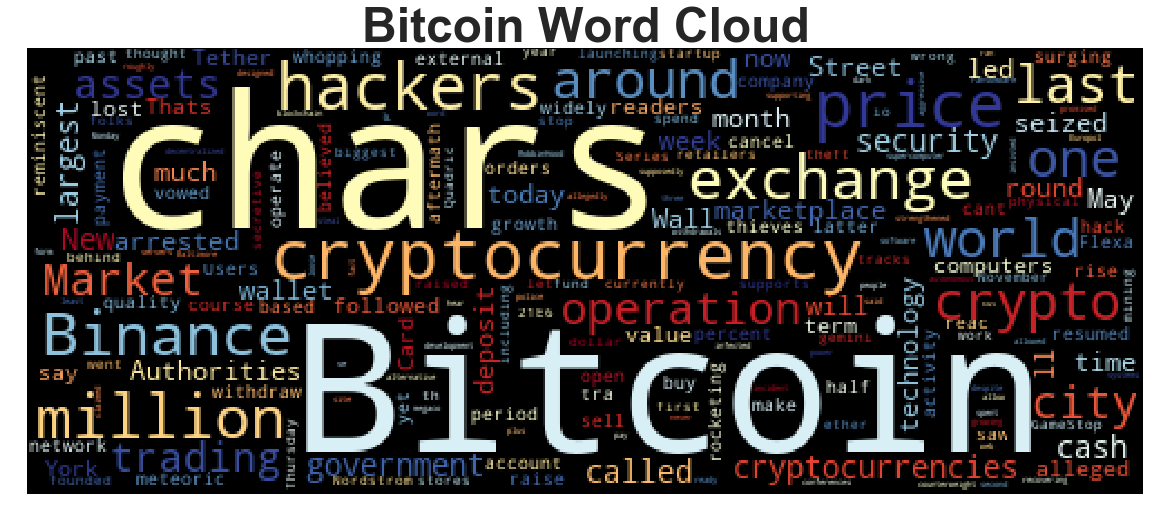

In [25]:
# Generate the Bitcoin word cloud

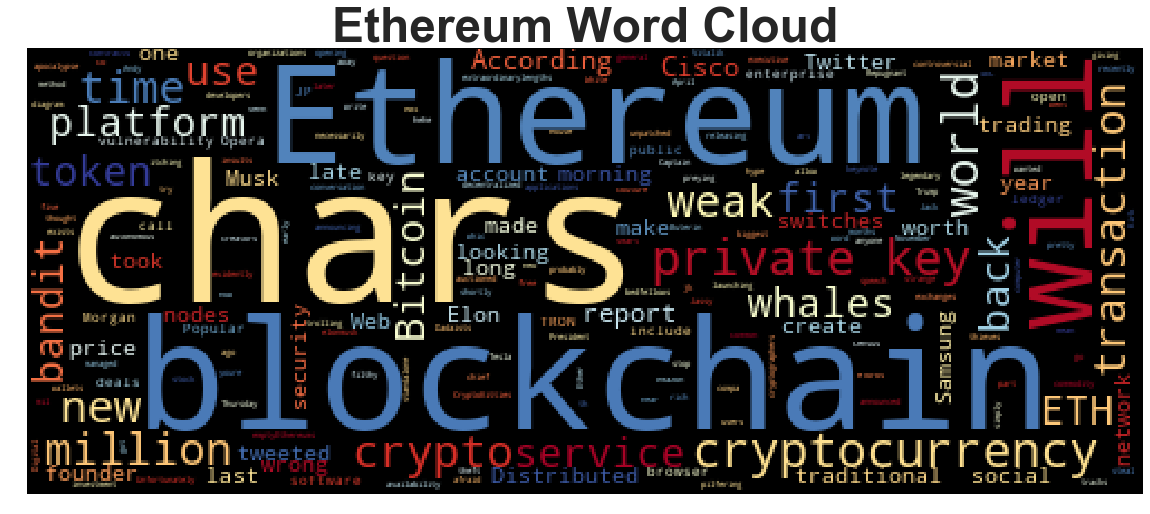

In [26]:
# Generate the Ethereum word cloud

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together

'Cryptocurrency exchange Binance has resumed trading activity. Users can now cancel open orders, deposit crypto assets into their Binance account, and of course buy and sell cryptocurrencies. You cant withdraw crypto assets to an external wallet just yet, but … [+1191 chars]Bitcoin is now trading at around $8,130, up a whopping 60.84 percent over the past month, with the price surging $3,086.14 over the period.\r\nThe cryptocurrency’s meteoric rise is reminiscent of its rocketing growth in the latter half of 2017, when prices reac… [+4311 chars]Binance has vowed to raise the quality of its security in the aftermath of a hack that saw thieves make off with over $40 million in Bitcoin from the exchange.\r\nThe company — which is widely believed to operate the world’s largest crypto exchange based on tra… [+2269 chars]A new payment network called Flexa is launching today that’ll let you spend cryptocurrencies in physical stores. The technology currently supports bitcoin, ether, bitcoin ca

In [31]:
# Run the NER processor on all of the text

# Add a title to the document

In [32]:
# Render the visualization

In [33]:
# List all Entities

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text

# Add a title to the document

In [36]:
# Render the visualization

In [37]:
# List all Entities

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f